In [1]:
import torch
from dataset import MVFDataset

dataset = MVFDataset("data/frames/")

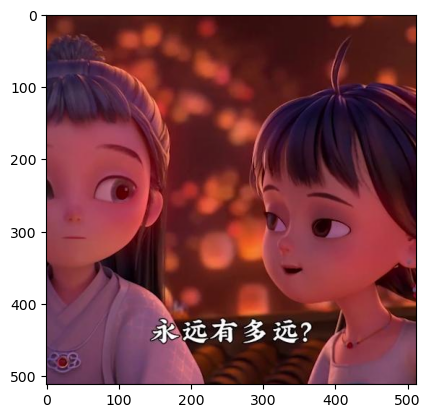

In [6]:
import matplotlib.pyplot as plt

plt.imshow(dataset[0][1].permute(1, 2, 0))

In [5]:
import dropboxdrivefs
from datasets import load_dataset_builder, DatasetBuilder, Dataset, load_dataset
import fsspec
import os

folder_path = "dropbox://MVFdataset"
output_dir = "dropbox://MVFdataset-parquet"
#fs = dropboxdrivefs.DropboxDriveFileSystem(token=os.environ["DBX_ACCESS_TOKEN"])
#fs.ls(folder_path)
storage_options = {"token": os.environ["DBX_ACCESS_TOKEN"]}

#Dataset.from_generator()
#dataset = load_dataset_builder(
#    "dropbox://MVFdataset", storage_options=storage_options
#).download_and_prepare(
#    output_dir, storage_options=storage_options, file_format="parquet"
#)

In [15]:
import dropbox
import dotenv
import dropbox.files
dotenv.load_dotenv()
dbx = dropbox.Dropbox(app_key=os.environ["DBX_APP_KEY"], app_secret=os.environ["DBX_APP_SECRET"])
shared_link ="https://www.dropbox.com/scl/fo/z3y2lpkse2ttkv7r6juwp/h?rlkey=novhi3doocnz2za7rv0vh36rx&dl=0"
sl = dropbox.files.SharedLink(url=shared_link)
dbx.files_list_folder(path='', shared_link=sl)[0].cursor

ListFolderResult(cursor='AAGyPGTuKHBp8-wC3HnZHtq-rRdq9iLcsB6k8kJx7BIO0A7S9lyNfL-yDFAhs2eSX2lgn1Nu0X549MHDlXI74ytfaF6TccB5jv5zKWfQ6fKZjbUV0TpQOdG6gz1447QFhGut4TUuYaCTomUTppL6__5BG514knLq4g1_SHC4O8RXrS0bpVCG7I8gocApxCQHpXWT57BDHYZi_HGDZioG_iZ46HO1QWs48ETYiCLaSGxVqkkLlb8sEZi-jKbAYxPhzkFilrHa-1BbKW3lKq2Mvs4b-KXthhhKAb2IuZA0oY9rnRtwBtYRYByOXOdaxhBZRUA', entries=[FileMetadata(client_modified=datetime.datetime(2023, 11, 3, 4, 48, 40), content_hash='ce1a5d38a5ea2b127a93c9094880faef40295a56f53286da4cf572c443527d67', export_info=NOT_SET, file_lock_info=NOT_SET, has_explicit_shared_members=NOT_SET, id='id:AlrBTkayoBYAAAAAAAB39g', is_downloadable=True, media_info=NOT_SET, name='BV1NV411s75y.zip', parent_shared_folder_id='3213881505', path_display=NOT_SET, path_lower=NOT_SET, preview_url=NOT_SET, property_groups=NOT_SET, rev='6093837e86816bf8ff0a1', server_modified=datetime.datetime(2023, 11, 3, 4, 48, 41), sharing_info=FileSharingInfo(modified_by='dbid:AADeYoUwtNRtSJUGFTJKH2o1STXGNU5_1mc', parent_

In [ ]:
from dropbox.files import FileMetadata
dbx.files_download()

In [19]:
dbx.files_list_folder(path='', shared_link=sl).entries[0].download_to_file("data/frames/0016.jpg")

AttributeError: 'FileMetadata' object has no attribute 'download_to_file'

In [6]:
load_dataset("dropbox://MVFdataset", storage_options=storage_options)

FileNotFoundError: Couldn't find a dataset script at /home/zc2309/workspace/scrap_bilibili/dropbox:/MVFdataset/MVFdataset.py or any data file in the same directory.